## Airlines Dataset to Predict Delays

#### Abstract:
Air travel is one of the most popular means of travel, both domestic and international. The number of global flights in 2021 was estimated to be 22.2 million ([IATA,2021](https://www.iata.org/contentassets/c81222d96c9a4e0bb4ff6ced0126f0bb/iata-annual-review-2021.pdf)). Based on data from the FAA prior to the COVID-19 pandemic, 2,900,000 passengers flew in and out of US airports ([FAA, 2022](https://www.faa.gov/air_traffic/by_the_numbers/media/Air_Traffic_by_the_Numbers_2022.pdf)). 

However, flight delays and cancellations - which are disruptive to travelers' itineraries - remain a cause for concern. 

According to a Bloomberg News report, the share of US flight delays caused by airlines, as opposed to weather or air traffic control, surged to the highest levels on record, reflecting carriers' struggle in the post-COVID travel rebound. Through April 2022, airlines triggered about 58% of late flights, surpassing those that were delayed due to storms or air-traffic system and security glitches. The severity of delays was reported to have risen sharply, with actions by airlines leading to 11.8 million minutes of delays through April, more than twice the 4.9 million minutes attributed to the aviation system (ATC and security) ([Bloomberg, 2022](https://www.bloomberg.com/news/articles/2022-07-15/flight-delays-in-us-linked-to-airlines-more-than-government)). 

With this in mind, making delay predictions before booking travel plan can be quite crucial.

In this project, we built an airline delay prediction model based on the Airlines dataset inspired by the regression dataset from Elena Ikonomovska. This dataset has 539383 instances and 8 different features, including the Airline, Flight, Time, DayOfWeek, etc. The dataset was clean as-is, with no missing or malformed values. There existed a slight imbalance between the two classes to be predicted. This was rectified by undersampling the majority class to achieve parity between classess. 

Data preprocessing involved converting any string data into numerical form using a OneHotEncoder. Numerical columns were also normalized to take values between 0 and 1. Manually performing the previous tranformations is tedious and error-prone, hence we set up an automated Pipeline to handle everything. The pipeline performs the proper transformations, and has as its final step the fitting of the model itself. 

Based on the classification report, the model attained an accuracy of 0.624 on the training dataset and 0.619 on the testing set. The overall precision of prediction was 0.64 with an F1 score of 0.60. Moreover, according to the permutation importance test, we found that the  `airline` and `time` of departure were the most important factors that affect the airline delay rates; the airport form/destination/day of week/length of traveling had lesser impact on delay.

#### Dataset Description:
The Airlines dataset was inspired by the regression dataset from Elena Ikonomovska, showing the different features of airlines from North America. The dataset contains 539383 instances and 8 different features, including:
• `Airline` - commercial airline carrier
• `Flight` - the flight number assigned by an airline
• `AirportFrom` - the flight origin airport
• `AirportTo` - the flight destination airport
• `DayOfWeek` - ordinal the day of week
• `Time`- time of flight
• `Length`- length of flight
• `Delay` - whether or not a flight was delayed


The dataset includes 18 US-based carriers: SouthWest Airlines (WN) had the most flights, and Hawaiian Airlines (HA) the least. There were 293 airports surveyed, with Atlanta International (ATL) being the busiest. 


(DO NOT click on the CSV file!)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
sns.set_palette("icefire")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [ ]:
df = pd.read_csv(
    "Airlines.csv",
    dtype={
        "id": "int32",
        "Flight": "int16",
        "DayOfWeek": "int8",
        "Time": "int16",
        "Length": "int16",
        "Delay": "int8",
    },
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int32 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int16 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int8  
 6   Time         539383 non-null  int16 
 7   Length       539383 non-null  int16 
 8   Delay        539383 non-null  int8  
dtypes: int16(3), int32(1), int8(2), object(3)
memory usage: 18.5+ MB


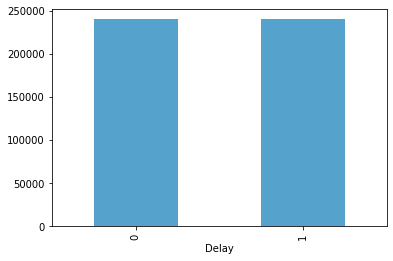

In [ ]:
df.groupby("Delay").count()["id"].plot(kind="bar")

### Rebalancing Data Classes

We observe a slight imbalance between the two dataclasses. While this imbalance is not large enough to invalidate `accuracy` as a metric, over-representation of the negative class (0) has been shown to have a pronounced effect on `recall`. 

First, we'll rebalance the classes using random undersampling, wherein random samples from the majority class (0) are removed until both classes are equal in the transformed data.

### Stratified Resampling

The original dataframe, `df` contains over 500,000 entries. Due to resource constraints we are not able to use the entirety of the dataset. We take a stratified sample of 40% of the data. The result is a new dataframe `data` with slightly fewer than 200,000 entries. This should still be adequate enough to train a viable model. 

In [ ]:
A, b = RandomUnderSampler().fit_resample(df, df.Delay)

In [ ]:
df = A

In [ ]:
data = df.sample(frac=0.40)

### Exploratory Data Analysis

First we verify that the classes in the sampled dataframe `data` are balanced. Next we shall check for any correlations between the numerical variables. Finally we shall look at count plots of delayed vs ontime flights broken up by airline, arrival and depature airport, as well as day of the week.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192211 entries, 8464 to 42511
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           192211 non-null  int32 
 1   Airline      192211 non-null  object
 2   Flight       192211 non-null  int16 
 3   AirportFrom  192211 non-null  object
 4   AirportTo    192211 non-null  object
 5   DayOfWeek    192211 non-null  int8  
 6   Time         192211 non-null  int16 
 7   Length       192211 non-null  int16 
 8   Delay        192211 non-null  int8  
dtypes: int16(3), int32(1), int8(2), object(3)
memory usage: 8.1+ MB


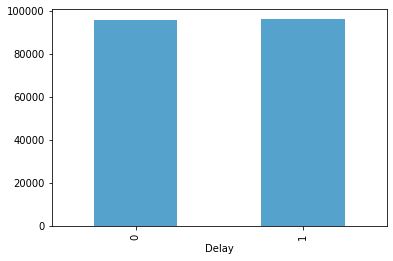

In [ ]:
data.groupby("Delay").count()["id"].plot(kind="bar")

In [ ]:
corr_df = data.drop(columns=["id", "Flight"]).corr()

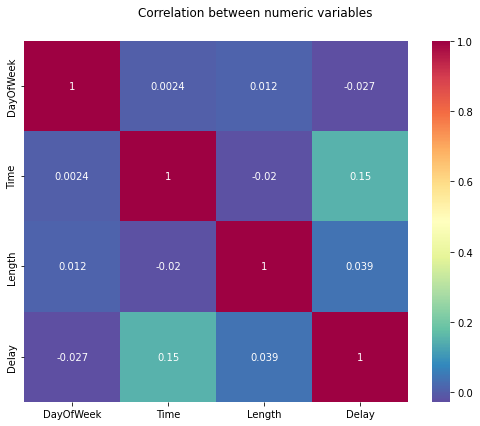

In [ ]:
g = sns.FacetGrid(data=corr_df, height=6, aspect=1.2)
g.map_dataframe(sns.heatmap, annot=True, cbar=True, cmap="Spectral_r")
g.fig.suptitle("Correlation between numeric variables")
g.fig.subplots_adjust(top=0.9)

We observe no strong correlations between the numerical variables. 

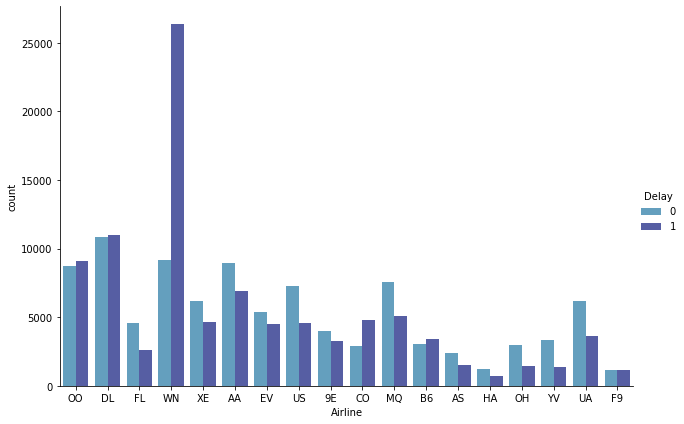

In [ ]:
sns.catplot(data=data, x="Airline", hue="Delay", kind="count", height=6, aspect=1.5)

Of the 18 airlines, South West Airlines (WN) dominates the dataset in the number of delays. This airline is an outright outlier compared to the rest.



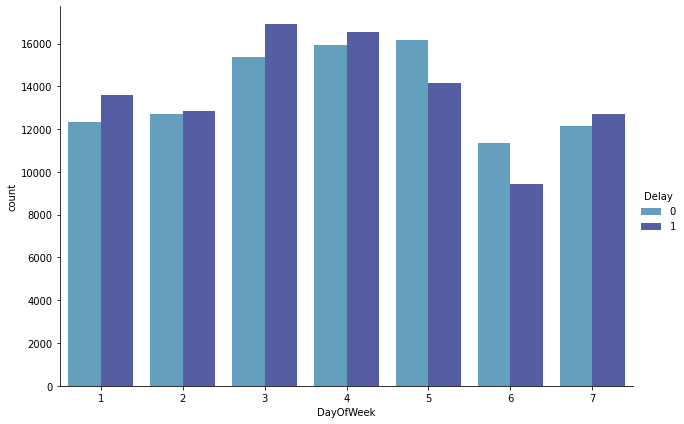

In [ ]:
sns.catplot(data=data, x="DayOfWeek", hue="Delay", kind="count", height=6, aspect=1.5)

We see that except for fridays and saturdays, flights are likely to be delayed on every day of the week.

In [ ]:
origin = data.groupby("AirportFrom").filter(lambda x: len(x) > 3000)
destination = data.groupby("AirportTo").filter(lambda x: len(x) > 3000)

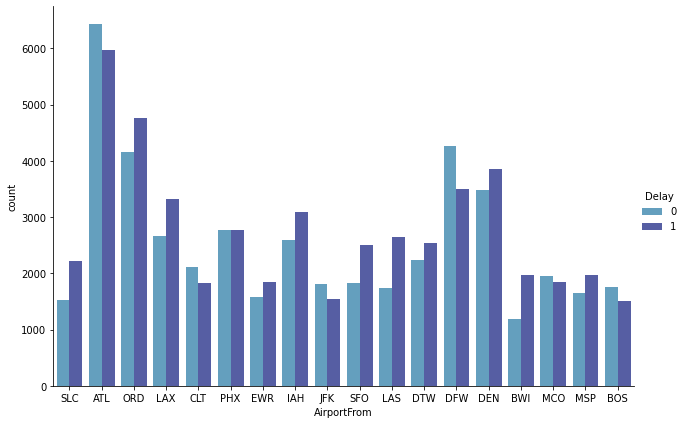

In [ ]:
sns.catplot(
    data=origin, x="AirportFrom", hue="Delay", kind="count", height=6, aspect=1.5
)

Here we look at the largest airports in the US. There are 293 unique airports in the dataset, with some like Aberdeen Regional Airport (ABR) appearing just once. Since it does not make sense to have a graphic showing all 293 airports, we selected an arbitrary cut-off point (3000 flights or more) to come up with a list of the 18 busiest airports. 

Looking at points of departure, Atlanta International Airport (ATL), the busiest airport in North America, dominates in the volume of flights. While ALT accounts for the absolute largest number of delays, the number of on-time flights outweighs the number of delays. A sizable amount of these large airports show more delays than on-time flights.

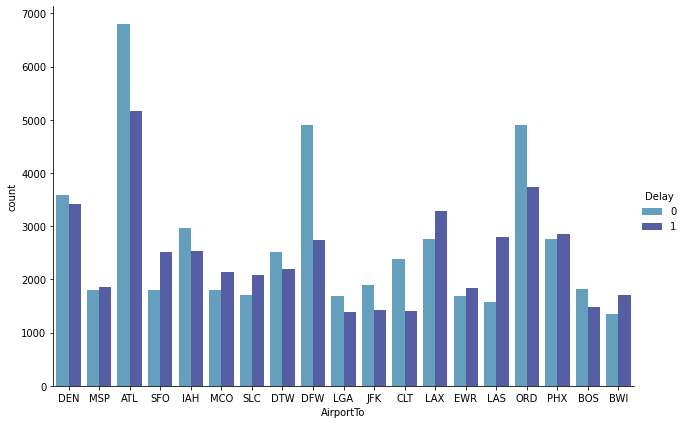

In [ ]:
sns.catplot(
    data=destination, x="AirportTo", hue="Delay", kind="count", height=6, aspect=1.5
)

The data for the destination airports tells a similart story: ATL dominates in sheer numbers, but is not the worst offender when it comes to the ratio of delays to on-time flights. 

Dallas Fortworth (DFW) is in a league of its own, having the greatest ratio of on-time to delayed flights. 

### Data Preprocessing
**Features**
Drop the id and Flight columns since neither are required for model fitting. The id column is merely a set of unique identifiers for each row, and the Flight is a generic flight number that's meaningless for our model.

The remaining data is comprised of both categorical and numerical data. The classifiers we're using cannot work with string data, therefore all categorical data has to be converted to numerical form using a OneHotEncoder, and the numerical data scaled to be within the same order of magnitudes. This ensures the model does not inadvertently place undue importance on numerically larger features.

**Column Transform**
To accomplish the steps above we use a ColumnTransformer.  Like all Preprocessing algorithms, we need to perform a fit_transform on the training data, and in order to prevent data leakage, do a simple transform on the testing set.

**Principal Component Analysis**
The resulting data (post OneHot-enconding) is a multi-dimensional sparse matrix. It is possible within such a matrix for a number of values to be (highly) linearly correlated such that one predictor variable can be linearly predicted from others with a high degree of accuracy. This may result in our model overfitting the training data. To mitigate this we reduce the number of principal components to a lower number. While this reduces multicollinearity in the dataset, the resulting variables become less interpretable since each component is a linear combination of the original features.

**Pipelining**
Both Preprocessing steps outlined above require fitting and then transforming the training data; and then transforming (without fitting) the testing data to prevent data leakage. Manually performing such steps is tedious and error-prone, hence we set up an automated Pipeline. This pipeline will perform the proper transformations on the proper dataset, and has as its final step the fitting of the model itself.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
X, y = data.drop(columns=["id", "Delay", "Flight"], axis=1), data.Delay

In [ ]:
numerical_ix = X.select_dtypes(include=["int8", "int16", "int32", "float64"]).columns
categorical_ix = X.select_dtypes(include=["object"]).columns

In [ ]:
t_steps = [
    (
        "cat",
        OneHotEncoder(sparse=False, handle_unknown="infrequent_if_exist"),
        categorical_ix,
    ),
    ("num", MinMaxScaler(), numerical_ix),
]

In [ ]:
col_transform = ColumnTransformer(transformers=t_steps)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Modelling

We fit an `AdaBoostClassifier` to the pipeline, and then try to predict whether or not a flight will be delayed. 

[AdaBoost](https://blog.paperspace.com/adaboost-optimizer/) (Adaptive Boosting) is an ensemble learning method which uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones. Rather than being a model in itself, AdaBoost can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model. 

In [ ]:
model = AdaBoostClassifier()

In [ ]:
pipeline = Pipeline(
    steps=[
        ("prep", col_transform),
        ("pca", TruncatedSVD(n_components=20)),
        ("m", model),
    ]
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse=False),
                                                  Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['DayOfWeek', 'Time', 'Length'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=20)),
                ('m', AdaBoostClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

#### Model Evaluation

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    jaccard_score,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
)

In [ ]:
print(f"Train Accuracy: {pipeline.score(X_train, y_train):.3f}")
print(f"Test Accuracy: {pipeline.score(X_test, y_test):.3f}")

Train Accuracy: 0.624
Test Accuracy: 0.619


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

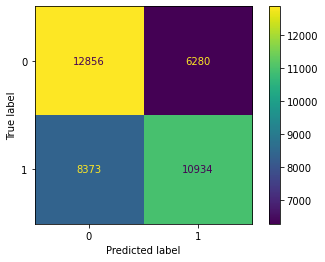

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
TN, FP, FN, TP = cm.ravel()

In [ ]:
print(f"Num. True Positives: {TP}")
print(f"Num. True Negatives: {TN}")
print(f"Num. False Positives: {FP}")
print(f"Num. False Negatives: {FN}")

Num. True Positives: 10934
Num. True Negatives: 12856
Num. False Positives: 6280
Num. False Negatives: 8373


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64     19136
           1       0.64      0.57      0.60     19307

    accuracy                           0.62     38443
   macro avg       0.62      0.62      0.62     38443
weighted avg       0.62      0.62      0.62     38443



In [ ]:
jaccard_score(y_test, y_pred, pos_label=1)

0.4273263766756556

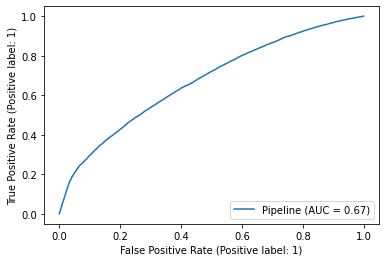

In [ ]:
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10)

In [ ]:
sorted_importances_idx = result.importances_mean.argsort()

In [ ]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

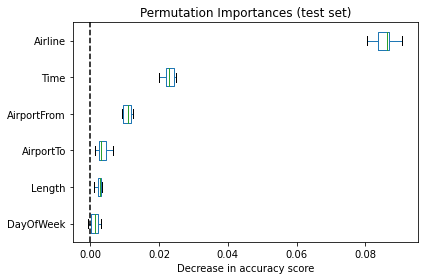

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### Discussion

#### Model Accuracy
The model gives an accuracy of 0.624 and 0.619 on the training and testing datasets respectively. While the model accuracy may appear unimpressive, it shows the model performs better than random chance (50% for a binary classifier). More importantly, the training and testing accuracy are within a few points of each other, which means the model is *not overfitting* the training dataset. 

#### Confusion Matrix
The confusion matrix is a table with 4 different combinations of predicted and actual values:
    - True Positives (TP)
    - True Negatives (TN)
    - False Positives (FP)
    - False Negatives (FN)
These values can be used to calculate metrics such as `accuracy`,`precision`, `recall`, `f1-score`. It should be noted that these metrics can easily be obtained from a **Classification Report** instead of being manually computed from a confusion matrix. 

#### Classification Report

A Classification report is used to qualify our prediction model by using a classification algorithm, including how many predictions are True or False by using the TP, TN, FP, and FN values from the confusion matrix. In the classification report, the precision, Recall, and F1 score of our model were calculated.

**Precision** is the ability to not to label an instance positive when it is negative. The precision is calculated by the ratio of TP of the sum of TP and FP. The precision of our model is 0.64, indicating 64% of the positive results were true.

**Recall** is used to find all the positive instances in the results.it is defined as the ratio of TP to the sum of TP and FN. In our results, the recall was calculated as 0.57.

**F1-score** is a weighted harmonic mean of the precision and the recall, which is in a range of 0~1. The best score is 1 and the worst is 0. In our results, the F1 score was 0.60, indicating the 60% of the positive predictions in our model were correct.


#### Jaccard Score
The Jaccard score was calculated by comparing the members for test dataset and predict dataset to see which members are shared and which are distinct, in other words, to determine the similarity for the two datasets. The Jaccard score is in a range of 0% to 100%. The higher the percentage, the more similar the two datasets, In our model, the Jaccard score was calculated as 0.427, indicating 42.7% of the data were shared with the test dataset and predict dataset

#### ROC Curve and AUC Score
In the ROC curve, True Positive Rate (TPR) and False Positive Rate (FPR) at different classification thresholds was shown. Lowering the classification threshold results in more items into positive, leading to the increasing of both False Positives and True Positives. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. For our model, the AUC was calculated as 0.67 from the ROC curve.


#### Feature Importances
In the last part, the permutation importance of our model was evaluated with the factors of Airline, Time, Airport form, Day of week, and trip length. According to the permutation importance results, we found the type of airline and time of departure were the most important factors that affect the airline delay rates, with the decrease in accuracy scores of ~0,08 and ~0.02, respectively. However, the airport form/destination/day of week/length of traveling has less impact on the delay rate, with the decrease in accuracy scores all around ~0.01.

